# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience </a>


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as sps
import pandas as pd


red = '#FF3300'
blue = '#0099CC'
green = '#00CC66'

sns.set_style("whitegrid")

## Выборочные квантили

### Загрузка данных

В данной задаче вы изучите структуру графика `boxplot` и познакомитесь с выборочными квантилями.

Загрузите данные экспрессии белков у белых мышей и оставьте следующие белки для анализа:
* `pCAMKII_N`
* `pELK_N`
* `ARC_N`

In [8]:
data = pd.read_csv('Data_Cortex_Nuclear_quantilie.csv')
X=data[['pCAMKII_N',"pELK_N", 'ARC_N']]
X.head()

,pCAMKII_N,pELK_N,ARC_N
0,2.373744,1.750936,0.106305
1,2.292150,1.596377,0.106592
2,2.283337,1.561316,0.108303
3,2.152301,1.595086,0.103184
4,2.134014,1.504230,0.104784


### Подсчет выборочных квантилей

Для посчета выборочных квантилей в библиотеке `numpy` есть функция `numpy.quantile`. На вход ей передается исследуемый массив и значение квантиля.

Посчитайте с помощью этой функции выборочную медиану для признака `pCAMKII_N`

In [12]:
med = np.quantile(X['pCAMKII_N'], 0.5)
med

nan

Функция должна вернуть `nan`. Проверьте столбец на наличие пропусков, выведите их количество

In [16]:
X['pCAMKII_N'].isna().sum()

3

Получите значение выборочной медианы, удалив пропуски

In [18]:
X_drop = X['pCAMKII_N'].dropna()
med2 = np.quantile(X_drop, 0.5)
med2

3.3296242815

Для работы с пропущенными значениями в `numpy` есть специальная функция `numpy.nanquantile`

Посчитайте значение выборочной медианы с использованием этой функции (пропуски не удаляйте) и сравните ответы

In [20]:
med_nondrop = np.nanquantile(X['pCAMKII_N'], 0.5)
med_nondrop

3.3296242815

### Визуализация квантилей и изучение boxplot

Допишите функцию для совместной визуализации `boxplot` и гистограммы с нанесенными на нее квантилями

In [24]:
def draw_quintiles(data, alphas, ymax=0.4):
    '''
    data: pd.Series - столбец из рассматриваемого признака
    alphas: list[float] - массив из значений интересуемых квантилей, которые будут отрисованы
    ymax: float - максимальное значение для вертикальных линий на гистограмме
    '''
    title = data.name
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)},figsize=(14, 8))
    f.suptitle(f"Распределение {title}")

    sns.boxplot(x=data, ax=ax_box, color=blue)

    for alpha in alphas:
        nearest = np.nanquantile(data, alpha)
        ax_hist.vlines(nearest, 0, ymax, color="red", label=f'{alpha} квантиль')
    sns.histplot(data=data, kde=True, ax=ax_hist, stat='density')

    plt.legend()
    plt.show()

Какие квантили соответствуют границам "ящика с усами"? Допишите их и нарисуйте графики для разных признаков

In [25]:
alphas = [0.25, 0.5, 0.75]

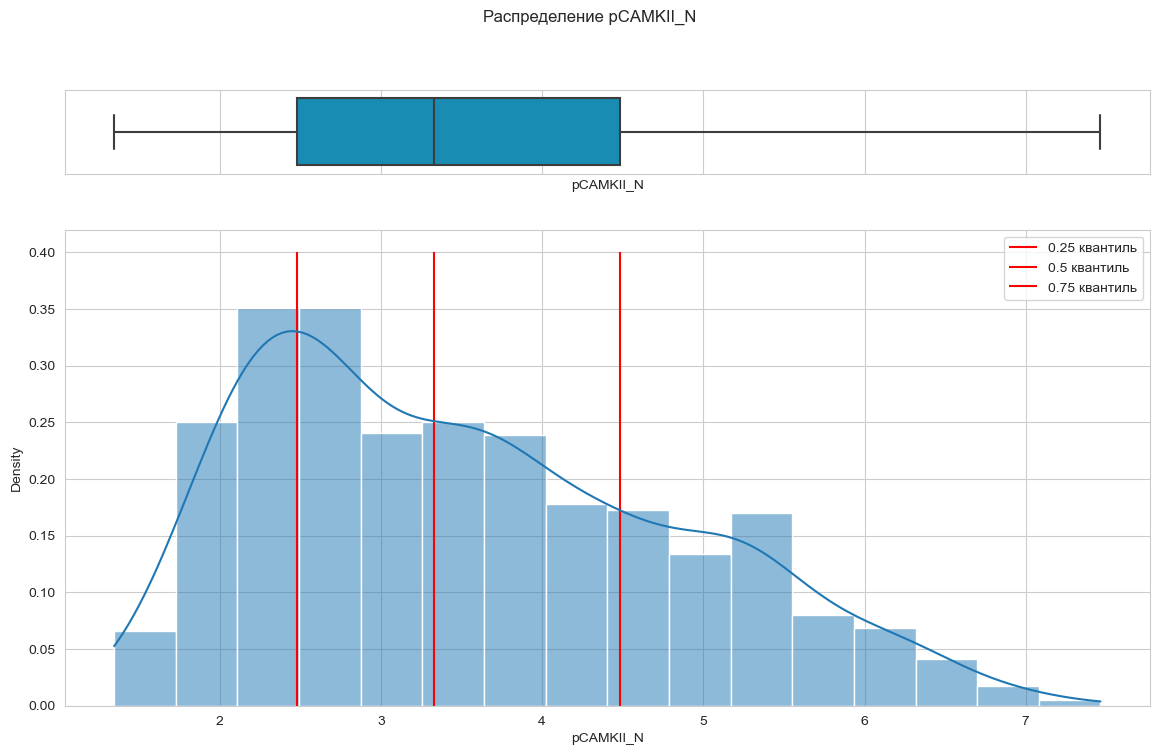

In [26]:
draw_quintiles(data.pCAMKII_N, alphas)

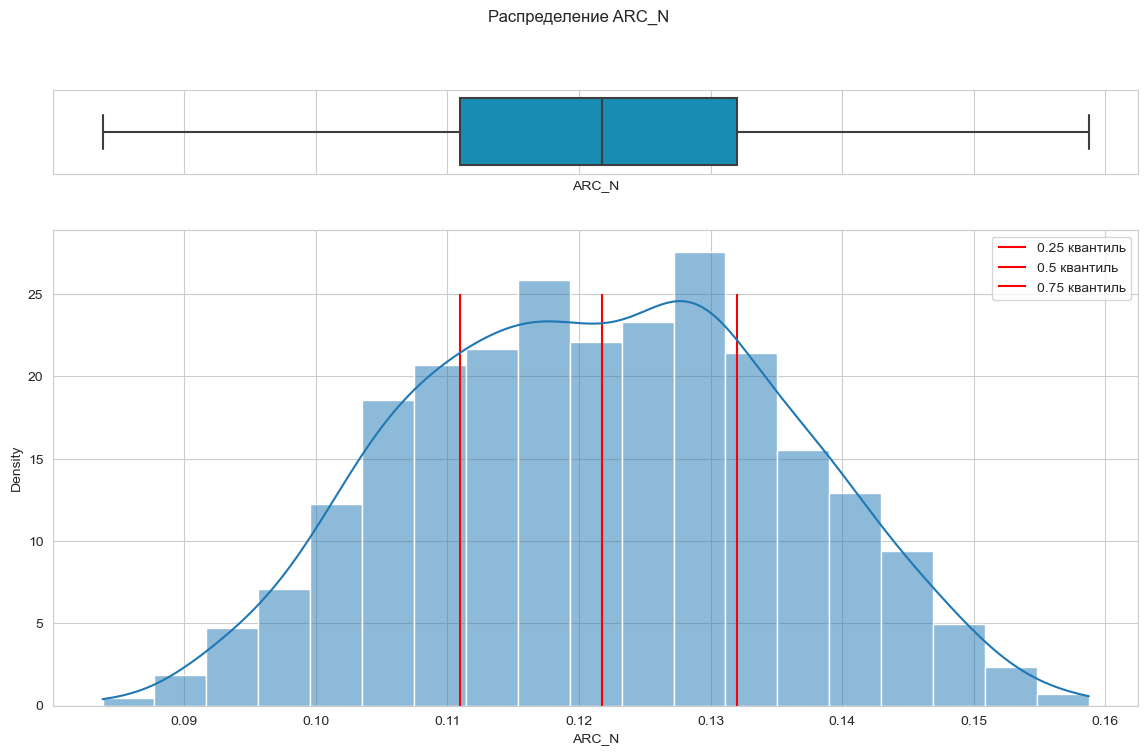

In [27]:
draw_quintiles(data.ARC_N, alphas, 25)

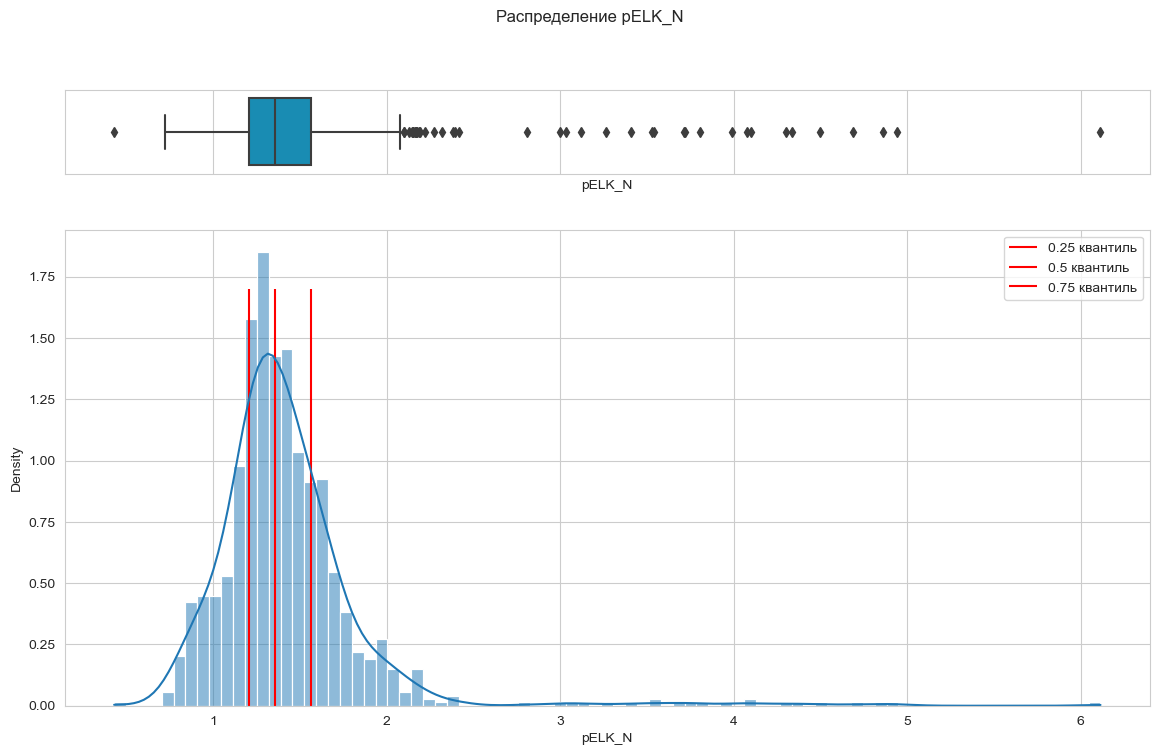

In [28]:
draw_quintiles(data.pELK_N, alphas, 1.7)

Сделайте вывод

**Ответ:** Мы нарисовали три гисторграммы и с помощью `boxplot`заметили присутствие большого числа выбросов на последнем графике. А ящикам с усами соответствуют 1/4, 1/2 и 3/4 квантилям

###  Сравнение медианы и среднего

Постройте гистограммы для каждой выборки, отметьте на них положение среднего и медианы. Объясните причины полученных расхождений (в случае их наличия)

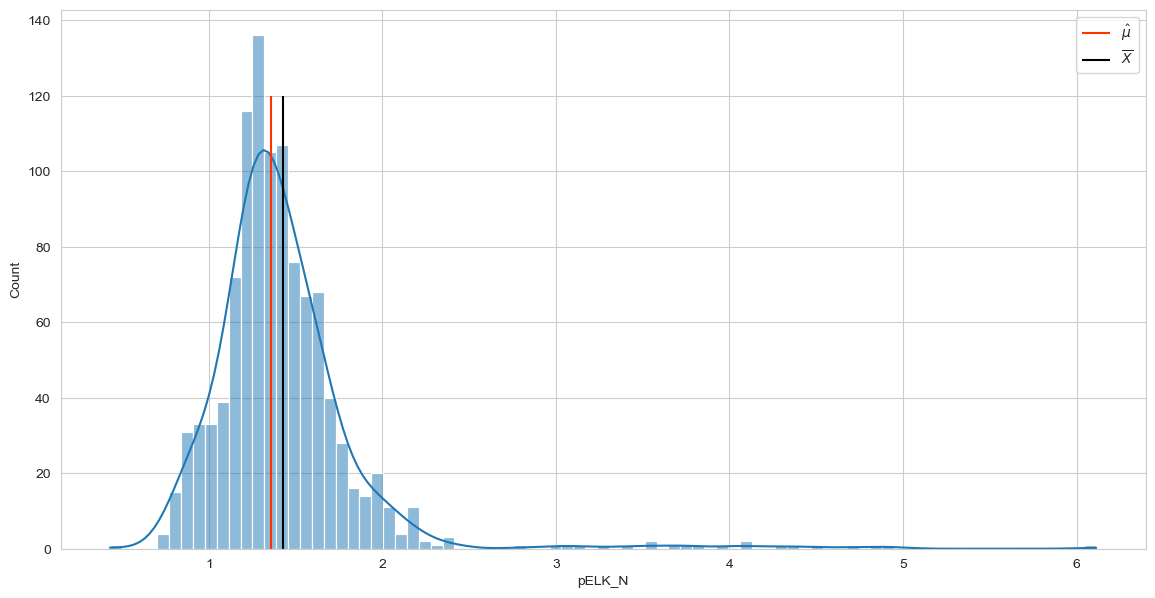

In [30]:
plt.figure(figsize=(14,7))
sns.histplot(data['pELK_N'],kde=True)

median_value = np.nanquantile(data['pELK_N'], 0.5)
mean_value = np.mean(data['pELK_N'])

plt.vlines(median_value, 0, 120, color=red,label=r'$\hat{\mu}$')
plt.vlines(mean_value, 0, 120, color='black',label=r'$\overline{X}$')
plt.legend();

**Ответ:** Положения среднего и медианы различаются, что связано с присутствием выбросов справа, это видно из `boxplot`.

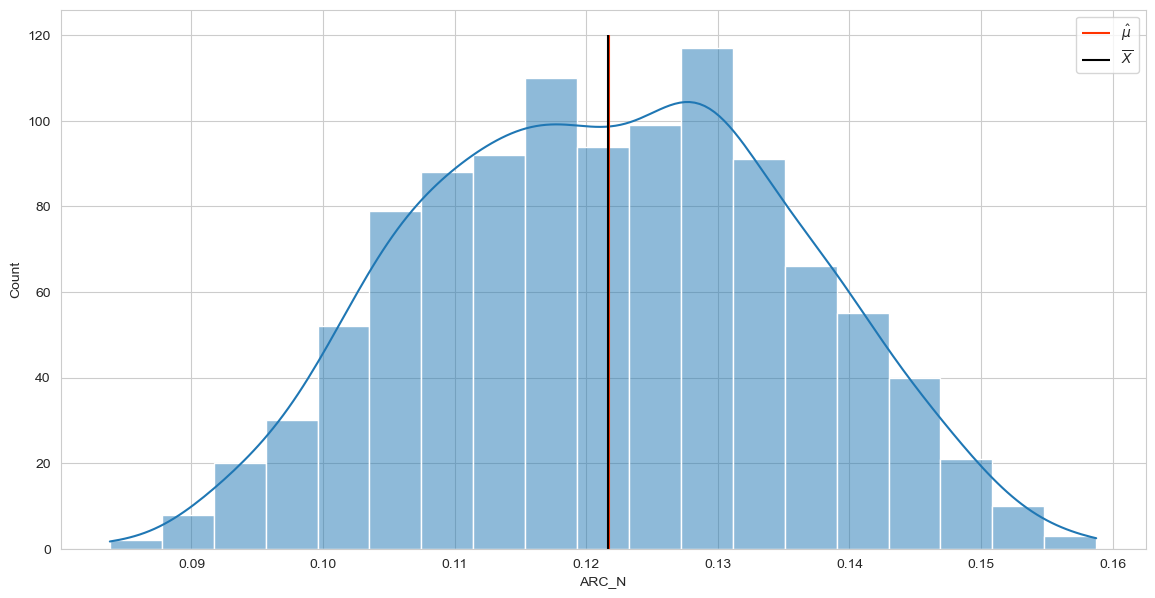

In [31]:
plt.figure(figsize=(14,7))
sns.histplot(data['ARC_N'],kde=True)

median_value = np.nanquantile(data['ARC_N'], 0.5)
mean_value = np.mean(data['ARC_N'])

plt.vlines(median_value, 0, 120, color=red,label=r'$\hat{\mu}$')
plt.vlines(mean_value, 0, 120, color='black',label=r'$\overline{X}$')
plt.legend();

**Ответ:** Положения среднего и медианы почти совпадают, это связано с отсутствием выбросов

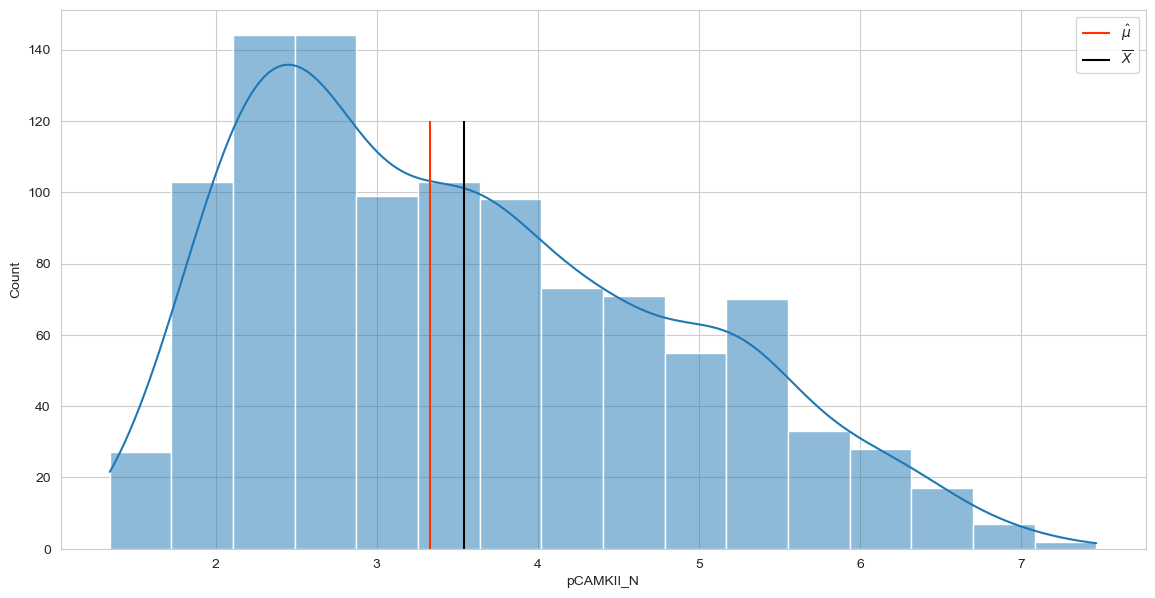

In [32]:
plt.figure(figsize=(14,7))
sns.histplot(data['pCAMKII_N'],kde=True)
median_value = np.nanquantile(data['pCAMKII_N'], 0.5)
mean_value = np.mean(data['pCAMKII_N'])

plt.vlines(median_value, 0, 120, color=red,label=r'$\hat{\mu}$')
plt.vlines(mean_value, 0, 120, color='black',label=r'$\overline{X}$')
plt.legend();

**Ответ:** Положения среднего и медианы различаются, что в данном случае связано с несимметричностью распределения

###  Устранение выбросов

Межквантильным размахом `IQR` называется расстояние между первым и третьем квартилем. Выбросами же принято счиать наблюдения которые находятся за пределами первого или же третьего квантиля на расстоянии более $1.5  \times \text{IQR}$.
Выберете признак с наиболее характерными выбросами, удалите их.

In [34]:
Q1 = np.nanquantile(data['pELK_N'], 0.25)
Q3 = np.nanquantile(data['pELK_N'], 0.75)
IQR = Q3 - Q1
no_outliers = data.pELK_N[(Q1 - 1.5*IQR < data.pELK_N) &  (data.pELK_N < Q3 + 1.5*IQR)]

Выведите гистограмму обработанной выборки и отметьте на нем положения среднего и медианы

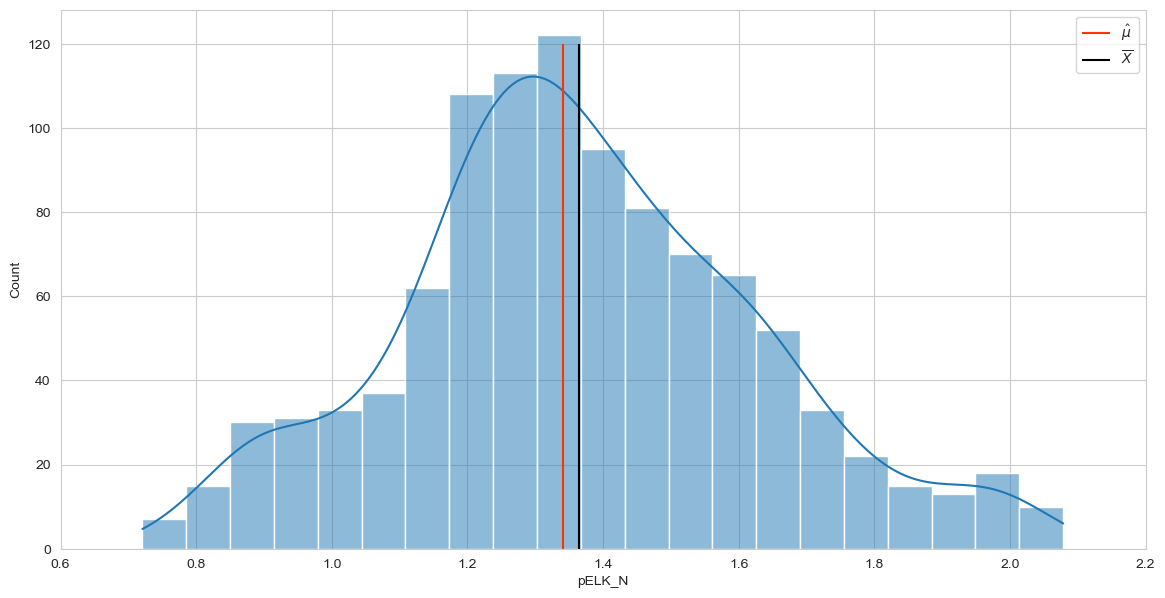

In [35]:
plt.figure(figsize=(14,7))
sns.histplot(no_outliers, kde=True)
median_value = np.nanquantile(no_outliers, 0.5)
mean_value = np.mean(no_outliers)

plt.vlines(median_value, 0, 120, color=red,label=r'$\hat{\mu}$')
plt.vlines(mean_value, 0, 120, color='black',label=r'$\overline{X}$')
plt.xlim(0.6, 2.2)
plt.legend();

А теперь постройте график на неотфильтрованный данных (как в предыдущем пункте). Для наглядности сравнения поставьте соответствующие границы для оси Ox.

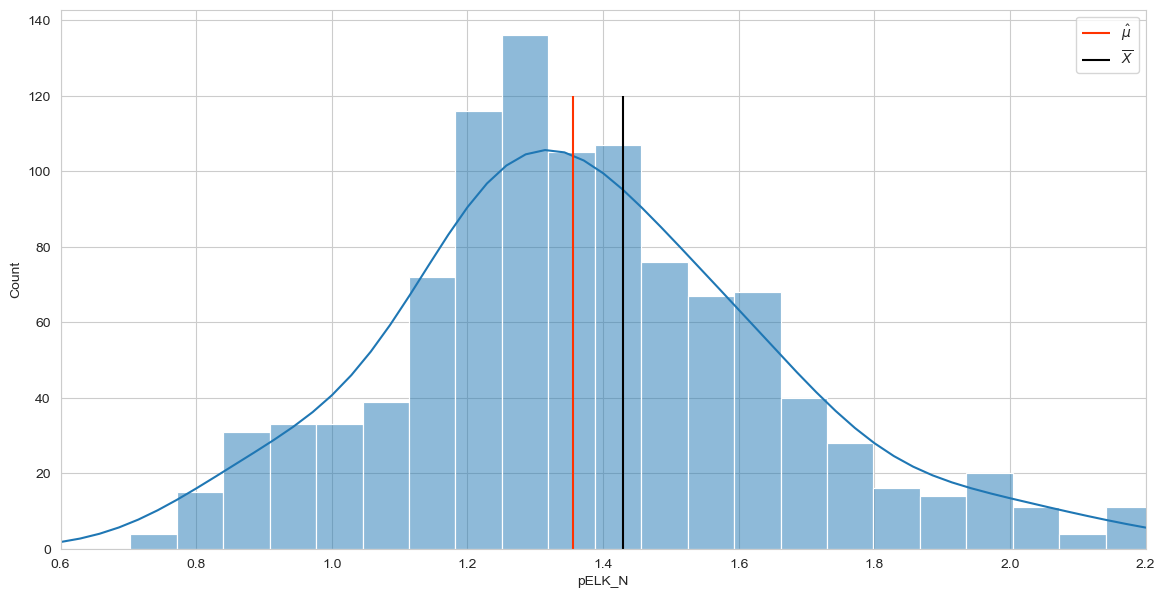

In [36]:
plt.figure(figsize=(14,7))
sns.histplot(data['pELK_N'],kde=True)
median_value = np.nanquantile(data['pELK_N'], 0.5)
mean_value = np.mean(data['pELK_N'])

plt.vlines(median_value, 0, 120, color=red,label=r'$\hat{\mu}$')
plt.vlines(mean_value, 0, 120, color='black',label=r'$\overline{X}$')
plt.xlim(0.6, 2.2)
plt.legend();

Объясните изменение положения оценок

**Ответ:** После того как мы убрали выбросы из выборки значение среднего стало ближе к медиане, так как *среднее* намного сильнее подвержено влиянию выбросов.